## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## Homework 5: due February 16, 2018

Please enter all answers within this notebook unless otherwise specified. As usual, don't forget to cite sources and collaborators.

Through this problem set, use the SageMath 8.1 kernel. Tips:

- You can use `preparser(False)` to turn off the Sage preparser (e.g., to avoid issues with pandas) and `preparser(True)` to turn it back on.
- To avoid issues with CoCalc, don't forget to delete temporary files.
- Run the following imports before executing cells using numpy or pandas.

In [1]:
import numpy as np
import pandas as pd

### Problem 1: Distances between cities

Grading criteria: correctness of code.

1a. Retrieve the CSV version of the [Zip Code Database](http://zips.sourceforge.net/), upload it into your project, and import it into a DataFrame.

In [2]:
#renaming the column headers and removing the " "
#one can also read_csv then perform the above afterwards
df1=pd.read_csv('zips.csv', names=['zip code','state abbreviation ','latitude','longitude','city','state'])
for i, column in enumerate(df1.columns):
    df1.iloc[:,i]=df1.iloc[:,i].str.replace('"','')

1b. Import the Excel file "state_capitals.xlsx" (sourced from Wikipedia, found in this directory) into a DataFrame.

In [3]:
df2 = pd.read_excel('state_capitals.xlsx')

1c. Construct a new DataFrame in which each row consists of:
- the name of a state;
- the two-letter postal abbrevation of the state;
- the name of the capital city;
- a list of the zip codes associated to that city;
- the latitude and longitude associated to the first zip code in the list.

In [4]:
preparser(False)

In [5]:
#Construct a table with State, Abbreviation, Capital by choosing/deleting relevant rows/columns
df3 = df2.copy()
df3 = df3.iloc[1:51,1:5]
df3 = df3.drop('Unnamed: 3',1)
df3.columns = ['State', 'Abbreviation','Capital']


In [6]:
#Define a function which returns a list of zipcodes, latitude and longitude for a given State and its Capital
def zip_lat_long(state,capital):
    zip = []
    lat = ""
    long = ""
    for i in range(len(df1.axes[0])):
        if ' '+state == df1['state'][i] and ' '+capital == df1['city'][i]:
            zip.append(int(df1['zip code'][i]))
            if lat == "" or long == "":
                lat = CDF(df1['latitude'][i])
                long = CDF(df1['longitude'][i])
    return zip,lat,long

In [7]:
#Constructing the Zipcode, Latitude, Longitude columns, note that Frankfort is added manually
ziplist = []
latlist = []
lonlist = []
for i in range(1,51):
    zip,lat,long = zip_lat_long(str(df3['State'][i]),str(df3['Capital'][i]))
    ziplist.append(zip)
    latlist.append(lat)
    lonlist.append(long)
    if zip == []:
        zip.append(40601)

In [8]:
#Adding the columns together, and the latitude and longitude for Frankfort
df3['Zipcode'] = pd.Series(ziplist, index = df3.index)
df3['Latitude'] = pd.Series(latlist, index = df3.index)
df3['Longitude'] = pd.Series(lonlist, index = df3.index)
df3.loc[17, 'Latitude'] = 38.2009055
df3.loc[17, 'Longitude'] = -84.8732835
df3

,State,Abbreviation,Capital,Zipcode,Latitude,Longitude
1,Alabama,AL,Montgomery,"[36104, 36105, 36106, 36107, 36108, 36109, 361...",32.377509,-86.31068
2,Alaska,AK,Juneau,"[99801, 99850]",58.358599,-134.54749
3,Arizona,AZ,Phoenix,"[85003, 85004, 85006, 85007, 85008, 85009, 850...",33.451143,-112.07838
4,Arkansas,AR,Little Rock,"[72201, 72202, 72204, 72205, 72206, 72207, 722...",34.745692,-92.27987
5,California,CA,Sacramento,"[95814, 95815, 95816, 95817, 95818, 95819, 958...",38.580255,-121.49125
6,Colorado,CO,Denver,"[80202, 80203, 80204, 80205, 80206, 80207, 802...",39.751586,-104.99699
7,Connecticut,CT,Hartford,"[6103, 6105, 6106, 6112, 6114, 6120]",41.767049,-72.67433
8,Delaware,DE,Dover,"[19901, 19904]",39.16426,-75.51163
9,Florida,FL,Tallahassee,"[32301, 32303, 32304, 32308, 32310, 32311, 323...",30.431283,-84.26903
10,Georgia,GA,Atlanta,"[30303, 30305, 30306, 30307, 30308, 30309, 303...",33.752856,-84.39013


### Problem 2: Minimum spanning trees

Grading criteria: correctness of code. Note: you will need to reference your answer to problem 1, but this problem will be graded independently (i.e., as if your answer to problem 1 is correct, whether it is or not).

William Stein announces the formation of CoCalc Fiber, a new broadband network which will connect the capital cities of the 48 continental United States (excluding Alaska and Hawaii) with a series of underground cables joining certain pairs of cities. Naturally, William wants to minimize the cost of building this network; he assumes that the cost of building a network link between some pairs of cities is proportional to the distance between those two cities.

2a. Define a function that implements the [haversine formula](https://en.wikipedia.org/wiki/Haversine_formula): given two latitude-longitude pairs, compute the distance between those two points on Earth. Use kilometers instead of miles, because [the US was supposed to convert to the metric system in 1975](https://en.wikipedia.org/wiki/Metrication_in_the_United_States). Check your formula by computing the distance between New York City and San Diego, as reported by the [Great Circle Mapper](http://www.gcmap.com/) web site.

In [9]:
#Distance function given latitudes and longitudes of two points
def dist(lat1,lon1,lat2,lon2):
    lat1 = (lat1)*pi/180
    lon1 = (lon1)*pi/180
    lat2 = (lat2)*pi/180
    lon2 = (lon2)*pi/180
    return RR(2* 6371* arcsin( (sin((lat2 - lat1)/2)**2 + cos(lat1)*cos(lat2)*(sin((lon2 - lon1)/2)**2) )**0.5))
dist(32.733556, -117.189666, 40.639926,-73.778694) #Should be ~3900 kilometers

3928.02845687260

2b. Construct a complete graph in which each vertex is labeled by the name of a state, and each edge is labeled by the distance between the capital cities.

In [10]:
#Removing Alaska, Hawaii
df3 = df3.drop([2,11])
df3 = df3.reset_index()

In [11]:
#Distance function for two capital cities
def dist1(state1,state2):
    index1 = vertices.index(state1)
    index2 = vertices.index(state2)
    lat1,lon1 = df3.loc[index1, 'Latitude'], df3.loc[index1, 'Longitude']
    lat2,lon2 = df3.loc[index2, 'Latitude'], df3.loc[index2, 'Longitude']
    return dist(lat1,lon1,lat2,lon2)

In [12]:
#Creating a list of states, a complete graph and relabelling vertices of the graph by the distances between each state
vertices = [ str(df3['State'][i]) for i in range(0,48)]
G = graphs.CompleteGraph(len(vertices))
G.relabel(vertices)
for u,v,_ in G.edges():
    G.set_edge_label(u,v, dist1(u,v))

2c. Construct the minimal spanning tree corresponding to the optimal CoCalc Fiber network.

In [13]:
#Weights and minimal spanning tree
G.weighted(new = True)
H= G.min_spanning_tree()
H
#plotting the spanning tree would not be enlightening

[('Alabama', 'Florida', 290.464505771591),
 ('Alabama', 'Georgia', 235.401837205328),
 ('Alabama', 'Mississippi', 363.943879208483),
 ('Arizona', 'New Mexico', 608.218170408967),
 ('Arkansas', 'Mississippi', 334.930159215873),
 ('California', 'Nevada', 163.804167327820),
 ('Colorado', 'New Mexico', 467.827463700896),
 ('Colorado', 'Utah', 596.066959733611),
 ('Colorado', 'Wyoming', 155.404616786441),
 ('Connecticut', 'New Jersey', 245.764132396774),
 ('Connecticut', 'New York', 132.023510004992),
 ('Connecticut', 'Rhode Island', 104.730287883573),
 ('Delaware', 'Maryland', 87.3488770982968),
 ('Delaware', 'New Jersey', 133.574091418784),
 ('Georgia', 'South Carolina', 310.913752743612),
 ('Georgia', 'Tennessee', 345.289179355967),
 ('Idaho', 'Montana', 463.853807680178),
 ('Idaho', 'Nevada', 578.867366070901),
 ('Idaho', 'Oregon', 558.522025225758),
 ('Idaho', 'Utah', 477.440688249369),
 ('Illinois', 'Indiana', 302.602669377097),
 ('Illinois', 'Missouri', 256.559447034262),
 ('Illinois

2d. William decides to scale back his plans and connect only the Western states (meaning Montana, Wyoming, Colorado, New Mexico, and all continental states west of these). Furthermore, he is now only going to build links between states which are adjacent (meaning that they share a land border, not just a corner); and all city pairs will now be treated as costing the same amount. Construct the minimal spanning tree corresponding to the optimal network.

In [14]:
#List of Western states and minimal spanning tree
vertices1 = ['Montana','Wyoming','Colorado','New Mexico','Arizona','Utah','Idaho','Washington','Oregon','Nevada','California']
G = graphs.CompleteGraph(len(vertices1))
G.relabel(vertices1)
for u,v,_ in G.edges():
    G.set_edge_label(u,v, dist1(u,v))
G.weighted(new = True)
H= G.min_spanning_tree()
H
#h = Graph(H)
#h.plot()

[('Arizona', 'New Mexico', 608.218170408967),
 ('California', 'Nevada', 163.804167327820),
 ('Colorado', 'New Mexico', 467.827463700896),
 ('Colorado', 'Utah', 596.066959733611),
 ('Colorado', 'Wyoming', 155.404616786441),
 ('Idaho', 'Montana', 463.853807680178),
 ('Idaho', 'Nevada', 578.867366070901),
 ('Idaho', 'Oregon', 558.522025225758),
 ('Idaho', 'Utah', 477.440688249369),
 ('Oregon', 'Washington', 232.325038441383)]

### Problem 3: "Year-old bug ruined crypto!"

Grading criteria: correctness of code and explanations.

The article "[Socat slams backdoor, sparks thrilling whodunit -- Year-old bug ruined crypto](http://www.theregister.co.uk/2016/02/03/socat_backdoor_fix/)" is about a potential backdoor in some networking software [called Socat](http://www.dest-unreach.org/socat/), in which "the SSL implementation uses a non-prime number as its Diffie-Hellman $p$-parameter".  See also [Socat? What? (timeline of events)](https://github.com/mimoo/Diffie-Hellman_Backdoor/blob/master/socat_reverse/README.md).

3a. Using the Chinese remainder theorem, explain what the problem is with using a nonprime parameter in Diffie-Hellman.

An explanation of Diffie-Hellman can be found [here](https://mathworld.wolfram.com/Diffie-HellmanProtocol.html). Using the same notations, if $p$ is not prime, then we can write $p = n_1 \cdot \ldots \cdot n_r$ where $n_i$ are pairwise coprime. Thus, finding $g^a (mod \ p)$ can be reduced to finding $g^a (mod \ n_i)$ for $1 \leq i \leq r$ which is relatively easier to compute.

3b. The parameter $p$ in the Socat story is defined below. Use the `trial_division` function to find all prime factors of $p$ less than $10^6$.

In [15]:
p = 143319364394905942617148968085785991039146683740268996579566827015580969124702493833109074343879894586653465192222251909074832038151585448034731101690454685781999248641772509287801359980318348021809541131200479989220793925941518568143721972993251823166164933334796625008174851430377966394594186901123322297453

In [16]:
#Trial division
factors =[]
p1 = p
while p1 > 1:
    f = trial_division(p1, 10**6)
    factors.append(f)
    p1 = p1/f
factors

[271,
 13597,
 38894884397634366007356454548332370646972724268802781973440208895542936165564656473524541403310393405820598366261673173802130771236325314878371830363723788045821711985461441675679316058246609104355161134470046705337593170498462616195650378975298117141144096886684800236261920005248055422089305813639519]

3c. One theory that was floated about the Socat story is that the parameter $p$ had suffered from a transcription error, e.g., there is a prime that differs from $p$ in one decimal digit and this was what was intended. Write code to find all such primes. (Do not allow substituting a 0 for the leading digit.)

In [17]:
#Changing each digit by varying from 0-9 and noting that the leading digit can't be 0
dec_prime = []
for i in range(len(str(p))):
    for j in range(10):
        jstr = str(j)
        if jstr != str(p)[i]:
            plist = list(str(p))
            plist[i] = jstr
            p1 = int(''.join(plist))
            if is_prime(p1) is True and len(str(p1)) == len(str(p)):
                dec_prime.append(p1)
dec_prime

[143319364394905942617148968085785991039146683740268996579566827015580969124702493833109074343879894586655465192222251909074832038151585448034731101690454685781999248641772509287801359980318348021809541131200479989220793925941518568143721972993251823166164933334796625008174851430377966394594186901123322297453L,
 143319364394905942617148968085785991039146683740268996579566827015580969124702493833109074343879894586653465192222251909074832038151585448034731101690454685181999248641772509287801359980318348021809541131200479989220793925941518568143721972993251823166164933334796625008174851430377966394594186901123322297453L,
 143319364394905942617148968085785991039146683740268996579566827015580969124702493833109074343879894586653465192222251909074832038151585448034731101690454685781999248641772509287831359980318348021809541131200479989220793925941518568143721972993251823166164933334796625008174851430377966394594186901123322297453L,
 143319364394905942617148968085785991039146683740268996579566

3d. Repeat 3c but with binary digits instead of decimal digits.

In [18]:
#Repeat with binary
bin_prime = []
for i in range(len(bin(p)[2:])):
    for j in range(2):
        jstr = str(j)
        plist = list(bin(p)[2:])
        if jstr != plist[i]:
            plist[i] = jstr
            p1 = int(''.join(plist),2)
            if is_prime(p1) is True and len(str(p1)) == len(str(p)):
                bin_prime.append(p1)
bin_prime

[]

### Problem 4: A backdoor to factoring

Grading criteria: correctness of code and explanations.

4a. Explain, in your own words, the backdoor to factoring being described in this quote. (This topic is treated in more detail in Math 187B.)

> "We performed a large-scale study of RSA and DSA cryptographic keys in use on the Internet and discovered that significant numbers of keys are insecure due to insufficient randomness.  **We found that 5.57% of TLS hosts and 9.60% of SSH hosts share public keys in an apparently vulnerable manner...**" -- see https://factorable.net/


In general, RSA and DSA cryptographic keys are supposed to be large numbers that are hard to factorise. However, if we can find a pair such that they share a common factor, e.g., their gcd, then we would reduce our problem into factoring smaller numbers by dividing by their gcd's. From the quote, there is a lack of randomness or some nontrivial factors shared by the keys.

4b. Use this backdoor to factor the numbers $a$ and $b$ defined below.

a = 659481018095533082202091938200108415755014729057676791347712890248315591033900561408617722880031918351642894659648847446299804878752991957454382452262126117247899544055830787469355702640917

b = 223986669883088680371243199849357901244618017803455583407479556994195127176620839487674896299802613306139834600384565144314609009904613010988914195091967322701239166323910725912324556645705719757

In [19]:
a = 659481018095533082202091938200108415755014729057676791347712890248315591033900561408617722880031918351642894659648847446299804878752991957454382452262126117247899544055830787469355702640917

b = 223986669883088680371243199849357901244618017803455583407479556994195127176620839487674896299802613306139834600384565144314609009904613010988914195091967322701239166323910725912324556645705719757

p =gcd(a,b)
a1 = int(a/p)
b1 = int(b/p)
is_prime(a1), is_prime(b1)

(True, True)

4c. Compare the size of $a$ and $b$ to the current state of the RSA Factoring Challenge. Would it have been feasible to factor them without the backdoor?

In [20]:
a2 = str(a)
b2 = str(b)
len(a2), len(b2)

(189, 195)

According to [RSA Factoring Challenge](https://en.wikipedia.org/wiki/RSA_Factoring_Challenge), the numbers with (decimal) digits greater than 180 have been factored fairly recently (earliest in 2005) so it is relatively hard to factor them without the backdoor.

### Problem 5: Primitive roots

Grading criteria: correctness of code and explanations.

5a. Look up, then formulate in your own words, the statement of Artin's conjecture on primitive roots.

(Artin's Conjecture) Let $a$ be an integer that is not $1,-1$ or a square number. Then there exists infintely many primes $p$ such that $a$ is a primitive root (mod $p$). Moreover, the density of $a$ being a primitive root modulo $p$ for all primes $p$ is independent of $a$ and is equal to Artin's constant $0.3739558136\ldots$.

5b. Compute, to at least five decimal places, the prediction made by Artin's conjecture for the probability that 2 is a primitive root modulo a random prime $p$.

In [21]:
#Computing the predicted value, should match Artin's constant
c = 1
for i in prime_range(10000): 
    p = i
    c = c*(1 - 1/(p*(p-1)))
float(c)

0.37395948446710636

5c. Write a function that, given an input $n$, computes the probability that 2 is a primitive root modulo a random prime less than $n$.

In [1]:
def prim(n):
    i = 3
    j = 0
    k = len(prime_range(3,n))
    while i < n:
        if primitive_root(i) == 2:
            j += 1
        i = next_prime(i)
    return RR(j)/RR(k)

5d. Make a plot of your answer to 5c for $n$ up to at least $10^6$, with at least 10 sample points (of your choice). Use a logarithmic scale on the $x$-axis.

In [2]:
#Choosing suitablle points so that the points appear to be evenly distributed on the x-axis
prim_prob = [ 100, 300, 1000, 3000, 10000, 40000, 100000, 300000, 1000000, 3000000, 10000000]
pts = [ (n, prim(n)) for n in prim_prob]

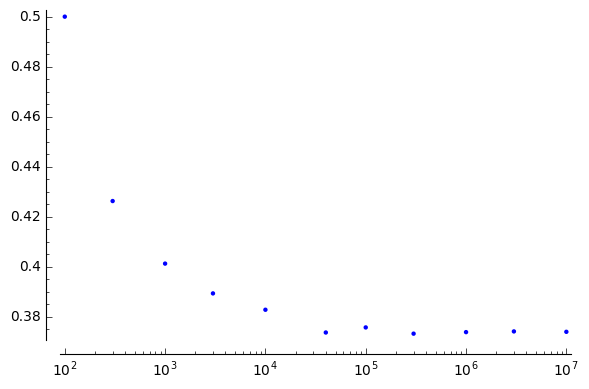

In [3]:
#Choice of plotting only the points/ connecting them/ line of best fit/ etc.
list_plot(pts, scale='semilogx')

### Problem 6: Graphs and number theory

Grading criteria: correctness of code.

6a. Read the definition of a [Paley graph](https://en.wikipedia.org/wiki/Paley_graph), then write a function that, given a prime $p$ congruent to 1 modulo 4, constructs the Paley graph associated to that prime. (There also exist Paley graphs associated to prime powers, but your function need not construct those.)

In [4]:
#Sage already has a function for this: graphs.PaleyGraph(p)
def paley(p):
    if is_prime(p) and mod(p,4) ==1:
        M = Matrix(p, p, lambda i,j: legendre_symbol(i-j,p))
        for i in range(p):
            for j in range(p):
                if M[i,j] == -1:
                    M[i,j] = 0
        return Graph(M)
    else:
        print('Input must be a prime congruent to 1 modulo 4')

6b. Using your answer to 6a for $p=13$ and the [Paley construction](https://en.wikipedia.org/wiki/Paley_construction), construct (but do not print) a $28 \times 28$ which achieves the [Hadamard determinant bound](https://en.wikipedia.org/wiki/Hadamard%27s_inequality).

In [5]:
#Constructs the Q matrix
Q = paley(13).adjacency_matrix()
for i in range(13):
    for j in range(13):
        if i != j and Q[i,j] == 0:
            Q[i,j] = -1

#Paley construction II
l = [1]*13
j = vector(l)
M = zero_matrix(14)
M[0,1:] = j.row()
M[1:,0] = j.column()
M[1:,1:] = Q


#Replacement process
i1 = matrix([[1,-1],[-1,-1]])
i2 = matrix([[1,1],[1,-1]])
HadMat = zero_matrix(28)
for i in range(14):
    for j in range(14):
        if M[i,j] == 0:
            HadMat[2*i:2*i + 2, 2*j:2*j + 2] = i1
        elif M[i,j] == 1:
            HadMat[2*i:2*i + 2, 2*j:2*j + 2] = i2
        elif M[i,j] == -1:
            HadMat[2*i:2*i + 2, 2*j:2*j + 2] = -i2

6c. Check that your answer to 6b actually does achieve the Hadamard bound.

In [6]:
RR(prod(norm(HadMat[:,i]) for i in range(28)))

1.82059119829943e20

In [7]:
RR(HadMat.det())

1.82059119829943e20

In [8]:
#Sage has a function for Hadamard matrix of Paley II
RR(sage.combinat.matrices.hadamard_matrix.hadamard_matrix_paleyII(28).det())

1.82059119829943e20